<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('./datasets/bike_sharing_data.txt')

In [4]:
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


### Task 3: Visualize the Data
---

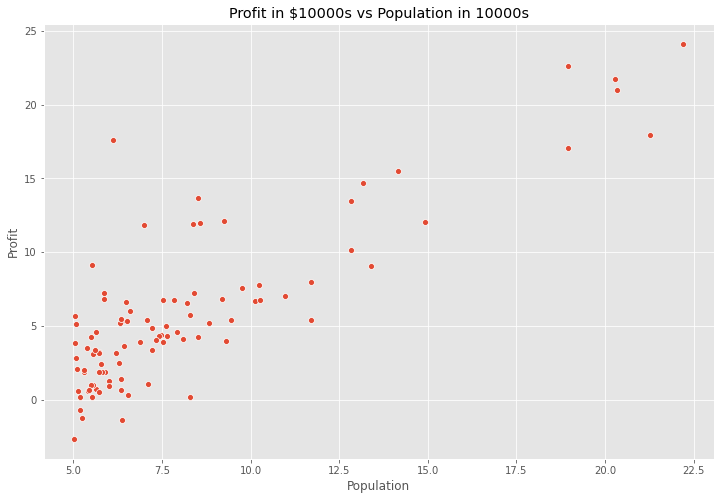

In [5]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit in $10000s vs Population in 10000s");

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def cost_function(x, y, theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y) ** 2
    return (1 / (2 * m)) * np.sum(error)

In [7]:
m = data['Population'].values.size
x = np.append(np.ones((m, 1)), data['Population'].values.reshape(m, 1), axis=1)
y = data['Profit'].values.reshape(m, 1)
theta = np.zeros((2, 1))

cost = cost_function(x, y, theta)
cost

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [8]:
def gradient_descent(x, y, theta, alpha, iterations):
    m = len(x)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta -= alpha * 1 / m * error
        costs.append(cost_function(x, y, theta))
    return theta, costs

In [9]:
theta, costs = gradient_descent(x, y, theta, 0.01, 2000)

### Task 6: Visualising the Cost Function $J(\theta)$
---

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
theta_0 = np.linspace(-10, 10, 100)
theta_1= np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        theta_val = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, theta_val)

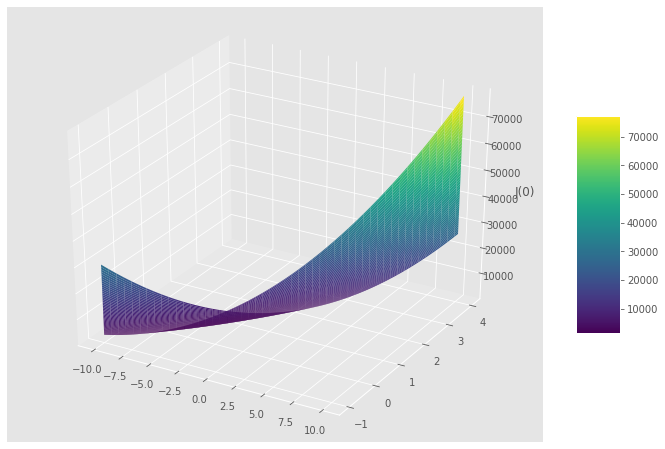

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel = '0_1'
plt.ylabel = '0_1'
ax.set_zlabel('J(0)')
ax.view_init(30, 300)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

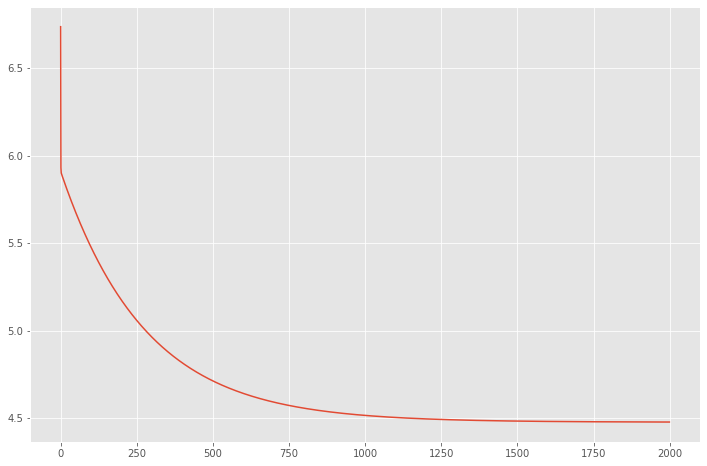

In [13]:
plt.plot(costs)
plt.xlabel = 'Iterations'
plt.ylabel = 'J(0)'

### Task 8: Training Data with Linear Regression Fit
---

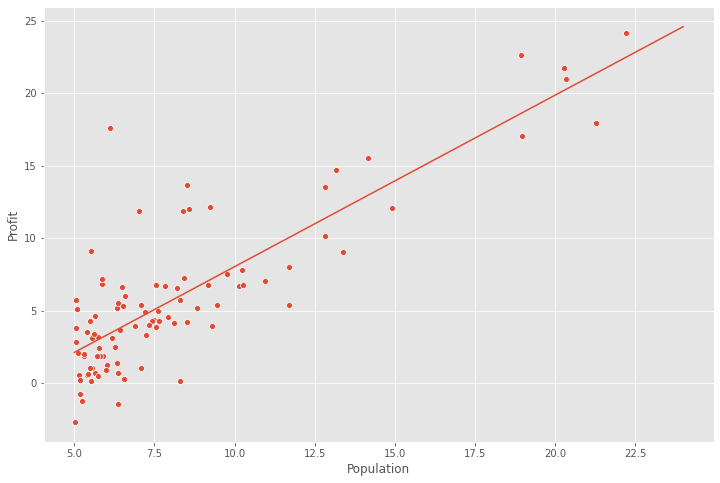

In [14]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)
x_value = [x for x in range(5, 25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel = 'Population'
plt.ylabel = 'Profit'
ax.set_title("Profit in $10000s vs Population in 10000s Regression Fit");
plt.show()